## Test clustering of a vectorized text
To demonstrate the usage of the module a clustering for a matrix of text vectors will be performed. The orininal text is not known , so the evaluation is not based on the text content, but only on the similarity matrix.

In [22]:
# some imports 
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
import matplotlib.pyplot as plt

from cluster import distance_matrix_cluster

First load some test data that represents a vectorized text with a lot of noise to generate fuzzy data as well as data that probably can be clustered. The text is vectorized with a vector of 300 values per text.

In [23]:

df = pd.read_csv("vectorized_text_ml.csv", index_col=0)
df

,Element_1,Element_2,Element_3,Element_4,Element_5,Element_6,Element_7,Element_8,Element_9,Element_10,...,Element_291,Element_292,Element_293,Element_294,Element_295,Element_296,Element_297,Element_298,Element_299,Element_300
0,-0.007904,0.035546,0.047192,-0.007949,0.010477,-0.008182,-0.011445,-0.035753,0.035454,-0.015821,...,-0.004002,-0.001356,-0.025596,0.053442,0.008956,-0.019150,0.021031,0.003122,0.015676,0.006401
1,-0.015593,-0.009980,0.067272,-0.052712,-0.054464,-0.030286,-0.004139,0.005415,0.087436,-0.014635,...,-0.022128,-0.020702,0.076411,0.025577,0.015466,-0.060988,-0.005455,0.053969,-0.027327,-0.016326
2,-0.017281,0.012375,0.093076,-0.025339,-0.000575,-0.049027,-0.027204,-0.008726,0.067860,-0.026168,...,0.024719,-0.000294,-0.029040,0.044461,0.007957,0.020727,-0.003044,-0.000016,0.055452,-0.023106
3,0.013207,-0.023613,0.067088,-0.058188,-0.042209,-0.027906,-0.021455,0.021099,0.073236,-0.003298,...,0.032787,0.011478,0.021706,0.042530,-0.000442,0.022608,0.028816,-0.023278,0.015186,0.021627
4,-0.028641,0.045754,0.049446,-0.017503,-0.002231,-0.006154,-0.019927,0.002523,0.076408,-0.005986,...,0.009361,-0.013873,-0.002249,0.013598,0.001228,-0.018153,0.020685,0.017729,0.014282,-0.011329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,-0.014926,0.044086,0.063523,-0.014722,-0.024292,-0.006077,0.007870,0.019977,0.050961,-0.011557,...,0.004423,0.011998,0.006815,0.067788,0.005480,-0.032951,0.016450,0.018089,0.020696,0.000084
1460,0.018252,0.005552,0.081457,-0.032444,-0.027932,-0.007303,0.009944,0.014069,0.058845,-0.026925,...,0.010342,-0.018068,0.019487,0.041788,0.037231,-0.010978,0.014977,0.024400,0.018044,-0.006364
1461,-0.021851,0.041026,0.055648,0.012391,-0.074884,-0.022271,0.030518,0.003479,0.123126,-0.067492,...,-0.001367,-0.057175,0.069665,-0.002388,0.002154,0.007069,0.023099,0.043796,0.062445,0.022746
1462,0.017619,0.033429,0.074725,-0.081298,0.004957,0.069781,0.029782,0.048935,0.019385,0.002055,...,-0.000267,0.022087,-0.008716,-0.007719,-0.019213,-0.021987,0.010062,-0.031714,0.015724,-0.056254


As basis for the clustering generate the cosine distances between the vectors

In [24]:
# cosine distances
df_cos = cosine_distances(df)
#df_cos

Check some content of the matrix.

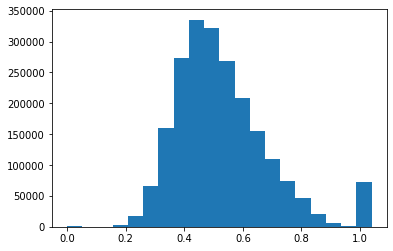

In [25]:
plt.hist(df_cos.flatten(), bins=20)
plt.show()

The values indicate that the points are not verry similar. However, there could be cluster of similar text in this as well. 

In [26]:
# replace the diagonal values in the distance matrix to be able to detect the right max/min values
df_cos2 = df_cos.copy()
np.fill_diagonal(df_cos2, 2)


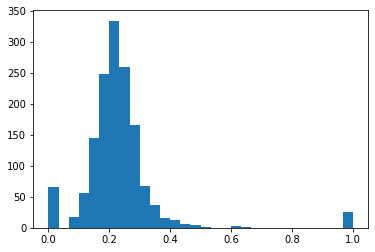

In [27]:
plt.hist(df_cos2.min(axis=0), bins=30)
plt.show()

We see the minimum distances of the points indicating that there may be clusters of similar texts, even if we would consider a value of 0.2 as similar.

Check some evaluations 

evaluate the points of the matrix with closest points and points arround to detect group, border, fussy points - but do not use optimization 

In [46]:
df_cos3 = cosine_distances(df)
cls = distance_matrix_cluster(step_size=0.005, similar_delta=0.15, optimizer="no", fuzzy_cluster=True)
cls.fit(df_cos3)
result_case1 = cls.transform(df_cos3)
print ("number of groups for case 1 : ", max(result_case1))


number of groups for case 1 :  57.0


In [35]:
result_case1

array([46., 18.,  0., ..., 36.,  0.,  0.])

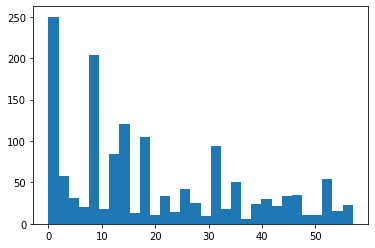

In [42]:
plt.hist(result_case1, bins=30)
plt.show()

We see clusters with different sizes, remember cluster 0 are the ones that not have been clustered to a group.

Make the same with optimization

In [41]:
cls2 = distance_matrix_cluster(step_size=0.005, similar_delta=0.15, optimizer="min-delta", fuzzy_cluster=True)
cls2.fit(df_cos3)
result_case2 = cls2.transform(df_cos3)
print ("number of groups for case 2 : ", max(result_case2))
case2_parameter = cls2.get_parameter()

number of groups for case 2 :  92.0


the optimization takes more time and get even more clusters in that case. 

In [36]:
result_case2

array([ 1.,  8.,  2., ..., 57.,  0.,  0.])

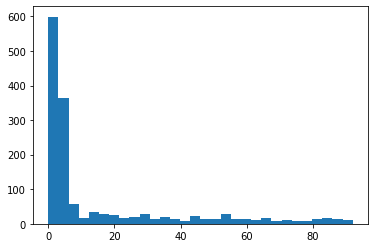

In [43]:
plt.hist(result_case2, bins=30)
plt.show()

The result of the optimized version is more different in that case. More smaller groups have been detected.

Make the same with optimization, but distribute the fuzzy points.

In [59]:
cls3 = distance_matrix_cluster(step_size=0.005, similar_delta=0.15, optimizer="min-delta", fuzzy_cluster=True, fuzzy_cluster_similarity=0.99)
cls3.fit(df_cos3)
result_case3 = cls3.transform(df_cos3)
print ("number of groups for case 3 : ", max(result_case2))
case3_parameter = cls3.get_parameter()

number of groups for case 3 :  92.0


the optimization takes more time and get even more clusters in that case and distributes all the fuzzy points. 

In [63]:
result_case3

array([ 1.,  8.,  2., ..., 57., 75.,  1.])

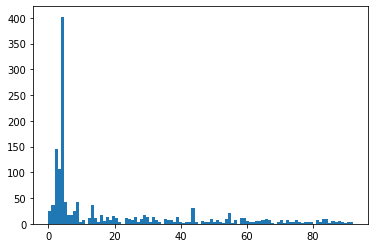

In [64]:
plt.hist(result_case3, bins=100)
plt.show()

The result of the optimized version is more different in that case. More smaller groups have been detected.

Checking the values against k-means with the same cluster numbers

In [50]:
from sklearn.cluster import KMeans
kmeans1 = KMeans(n_clusters=max(result_case1), random_state=0).fit(df_cos3).predict(df_cos3)
kmeans2 = KMeans(n_clusters=max(result_case2), random_state=0).fit(df_cos3).predict(df_cos3)


In [51]:
kmeans1

array([17, 49, 21, ..., 42, 24, 26], dtype=int32)

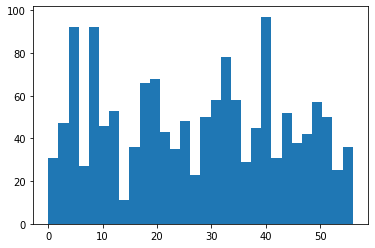

In [56]:
plt.hist(kmeans1, bins=30)
plt.show()

In [52]:
kmeans2

array([75, 77, 66, ..., 55, 62, 61], dtype=int32)

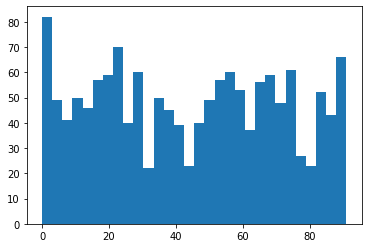

In [57]:
plt.hist(kmeans2, bins=30)
plt.show()

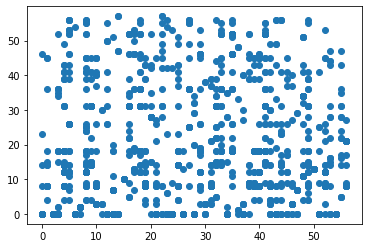

In [54]:
plt.scatter(x=kmeans1, y=result_case1)
plt.show()

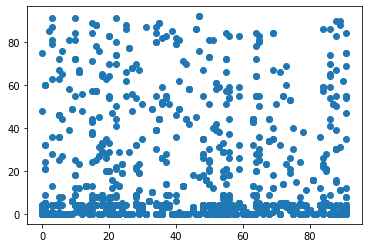

In [55]:
plt.scatter(x=kmeans2, y=result_case2)
plt.show()

In [ ]:
plt.scatter(x=kmeans2, y=result_case3)
plt.show()

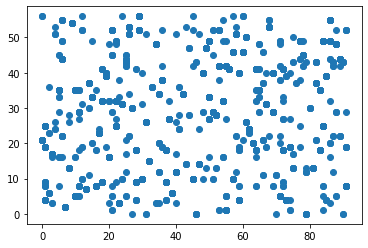

In [58]:
plt.scatter(x=kmeans2, y=kmeans1)
plt.show()

looks like the clusters are not verry similar, so the clustering is not replacing the k-means clustering.